In [1]:
# project: p13
# submitter: achandrashe4
# partner: none

In [2]:
import os, requests, json
import pandas as pd
from pandas import DataFrame, Series
from bs4 import BeautifulSoup
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def download(filename, url):
    # We do not download again if the file already exists
    if os.path.exists(filename):
        return (str(filename) + " already exists!")
    r = requests.get(url)
    r.raise_for_status()
    f = open(filename, "w", encoding = "utf-8")
    f.write(r.text)
    f.close()

    return (str(filename) + " created!")

In [4]:
download("countries.json", "https://raw.githubusercontent.com/msyamkumar/cs220-f20-projects/master/p13/countries.json")
countries = pd.read_json('countries.json')

In [5]:
conn = sqlite3.connect('countries.db')
countries.to_sql("countries", conn, if_exists="replace", index=False)
# remember to do conn.close() at the end of your notebook

In [6]:
#Q1: In our dataset, how many countries are in each region?
num_countries = pd.read_sql("""
SELECT region,
COUNT(country)
FROM countries
GROUP BY region
ORDER BY COUNT(country) DESC, region ASC
""", conn)
num_countries.columns = ["region", "number of countries"]
num_countries

,region,number of countries
0,SUB-SAHARAN AFRICA,42
1,LATIN AMER. & CARIB,33
2,WESTERN EUROPE,22
3,ASIA (EX. NEAR EAST),21
4,NEAR EAST,13
5,C.W. OF IND. STATES,12
6,OCEANIA,12
7,EASTERN EUROPE,8
8,NORTHERN AFRICA,5
9,BALTICS,3


[Text(0, 0, 'SUB-SAHARAN AFRICA'),
 Text(1, 0, 'LATIN AMER. & CARIB'),
 Text(2, 0, 'WESTERN EUROPE'),
 Text(3, 0, 'ASIA (EX. NEAR EAST)'),
 Text(4, 0, 'NEAR EAST'),
 Text(5, 0, 'C.W. OF IND. STATES'),
 Text(6, 0, 'OCEANIA'),
 Text(7, 0, 'EASTERN EUROPE'),
 Text(8, 0, 'NORTHERN AFRICA'),
 Text(9, 0, 'BALTICS'),
 Text(10, 0, 'NORTHERN AMERICA')]

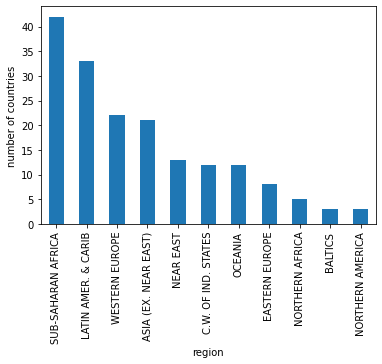

In [7]:
#Q2: How many countries are in each region? (answer with a plot)
region = num_countries["region"]
num_countries_per_region = num_countries.plot.bar(legend = None)
num_countries_per_region.set_xlabel("region")
num_countries_per_region.set_ylabel("number of countries")
num_countries_per_region.set_xticklabels(list(region.values))

In [8]:
#Q3: What is the total area of each region?
tot_area = pd.read_sql("""
SELECT region,
SUM(area)
FROM countries
GROUP BY region
ORDER BY SUM(area) DESC
""", conn)
tot_area.columns = ["region", "total area"]
tot_area

,region,total area
0,ASIA (EX. NEAR EAST),22177295
1,C.W. OF IND. STATES,22100843
2,LATIN AMER. & CARIB,20426877
3,NORTHERN AMERICA,19616143
4,SUB-SAHARAN AFRICA,19446660
5,OCEANIA,8488612
6,NORTHERN AFRICA,5752890
7,NEAR EAST,4340116
8,WESTERN EUROPE,3707838
9,EASTERN EUROPE,938554


[Text(0, 0, 'SUB-SAHARAN AFRICA'),
 Text(1, 0, 'LATIN AMER. & CARIB'),
 Text(2, 0, 'WESTERN EUROPE'),
 Text(3, 0, 'ASIA (EX. NEAR EAST)'),
 Text(4, 0, 'NEAR EAST'),
 Text(5, 0, 'C.W. OF IND. STATES'),
 Text(6, 0, 'OCEANIA'),
 Text(7, 0, 'EASTERN EUROPE'),
 Text(8, 0, 'NORTHERN AFRICA'),
 Text(9, 0, 'BALTICS'),
 Text(10, 0, 'NORTHERN AMERICA')]

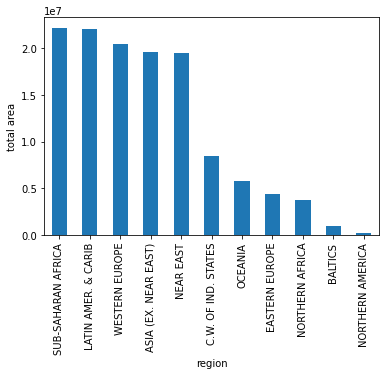

In [9]:
#Q4: What is the total area of each region? (answer with a plot)
s = num_countries["region"]
tot_area_plot = tot_area.plot.bar(legend = None)
tot_area_plot.set_xlabel("region")
tot_area_plot.set_ylabel("total area")
tot_area_plot.set_xticklabels(list(s.values))

In [10]:
#Q5: What is the area of each country in the Near East region?
near_east_area = pd.read_sql("""
SELECT country,
SUM(area)
FROM countries
WHERE region = "NEAR EAST"
GROUP BY country
ORDER BY area DESC
""", conn)
near_east_area.columns = ["country", "area"]
near_east_area

,country,area
0,Saudi Arabia,1960582
1,Turkey,780580
2,Yemen,527970
3,Iraq,437072
4,Oman,212460
5,Syria,185180
6,Jordan,92300
7,United Arab Emirates,82880
8,Israel,20770
9,Kuwait,17820


In [11]:
#Q6: What are the top 12 countries that have the largest real GDP?
lgst_real_gdp = pd.read_sql("""
SELECT country,
(population * `gdp-per-capita`) / 1000000000.0 AS `Real GDP(billion)`
FROM countries
GROUP BY country
ORDER BY `Real GDP(billion)` DESC
""", conn)
lgst_real_gdp.columns = ["country", "Real GDP(billion)"]
top_12 = lgst_real_gdp[:12].copy()
other = lgst_real_gdp[12:]["Real GDP(billion)"].sum()
top_12.loc[12,:] = ("other", other)
top_12

,country,Real GDP(billion)
0,United States,11281.191327
1,China,6569.868565
2,Japan,3594.473830
3,India,3176.520785
4,Germany,2274.855452
5,France,1680.181354
6,United Kingdom,1678.873538
7,Italy,1552.164690
8,Brazil,1429.394525
9,Russia,1271.752506


[Text(0, 0, 'United States'),
 Text(1, 0, 'China'),
 Text(2, 0, 'Japan'),
 Text(3, 0, 'India'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'France'),
 Text(6, 0, 'United Kingdom'),
 Text(7, 0, 'Italy'),
 Text(8, 0, 'Brazil'),
 Text(9, 0, 'Russia'),
 Text(10, 0, 'Canada'),
 Text(11, 0, 'Mexico'),
 Text(12, 0, 'other')]

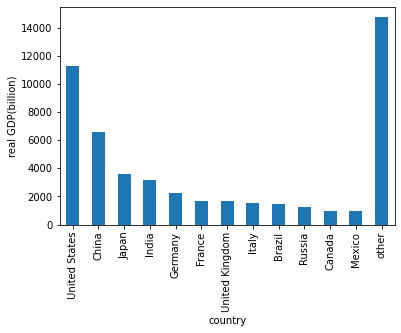

In [12]:
#Q7: What are the top 12 countries that have the largest real GDP? (answer with a plot)
country1 = top_12["country"]
top_12_plot = top_12.plot.bar(legend = None)
top_12_plot.set_xlabel("country")
top_12_plot.set_ylabel("real GDP(billion)")
top_12_plot.set_xticklabels(list(country1.values))

<AxesSubplot:xlabel='gdp-per-capita', ylabel='literacy'>

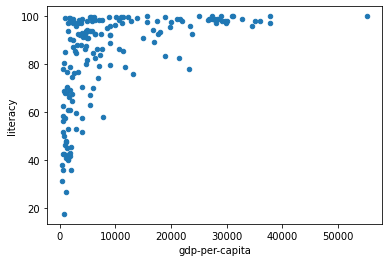

In [13]:
#Q8: What is the relationship between GDP per capita and literacy?
gdp_vs_literacy = pd.read_sql("""
SELECT `gdp-per-capita`, `literacy`
FROM countries
""", conn)
gdp_vs_literacy.columns = ["gdp-per-capita", "literacy"]
def convert(x):
    return float(x.replace(",","."))
gdp_vs_literacy["literacy"] = gdp_vs_literacy["literacy"].apply(convert)
gdp_vs_literacy.plot.scatter(x = "gdp-per-capita", y = "literacy")

In [14]:
#Q9: What is the correlation between GDP per capita and literacy?
gdp_vs_literacy.corr().iloc[0][1]

0.5154347345101354

<AxesSubplot:xlabel='gdp-per-capita', ylabel='phones'>

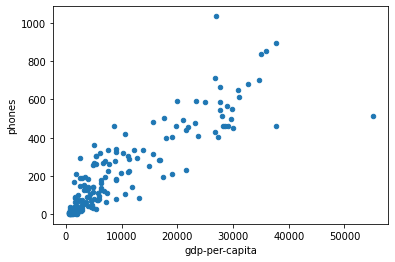

In [15]:
#Q10: What is the relationship between GDP per capita and phones?
gdp_vs_phones = pd.read_sql("""
SELECT `gdp-per-capita`, `phones`
FROM countries
""", conn)
gdp_vs_phones.columns = ["gdp-per-capita", "phones"]
def convert1(x):
    return float(x.replace(",","."))
gdp_vs_phones["phones"] = gdp_vs_phones["phones"].apply(convert1)
gdp_vs_phones.plot.scatter(x = "gdp-per-capita", y = "phones")

<AxesSubplot:xlabel='gdp-per-capita', ylabel='infant-mortality'>

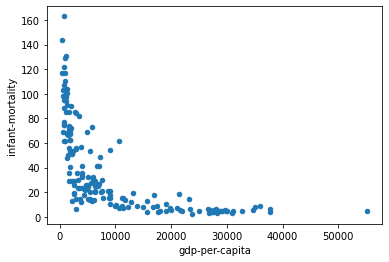

In [16]:
#Q11: What is the relationship between GDP per capita and infant-mortality?
gdp_vs_infant_mortality = pd.read_sql("""
SELECT `gdp-per-capita`, `infant-mortality`
FROM countries
""", conn)
gdp_vs_infant_mortality.columns = ["gdp-per-capita", "infant-mortality"]
gdp_vs_infant_mortality.plot.scatter(x = "gdp-per-capita", y = "infant-mortality")


<AxesSubplot:xlabel='gdp-per-capita', ylabel='inverse'>

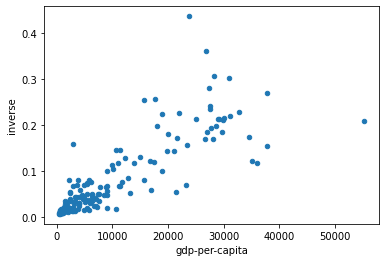

In [17]:
#Q12: What is the relationship between GDP per capita and inverse of infant-mortality?
gdp_vs_infant_mortality["inverse"] = 1 / gdp_vs_infant_mortality["infant-mortality"]
gdp_vs_infant_mortality.plot.scatter(x = "gdp-per-capita", y = "inverse")

In [18]:
#Q13: fit a y = m * x + n line to the scatter plot in question 10 using the least-squares method; what are the coefficients m and n?
gdp_vs_phones["1"] = 1

res = np.linalg.lstsq(gdp_vs_phones[["gdp-per-capita", "1"]], gdp_vs_phones["phones"], rcond=None)

# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n:
m = coefficients[0] # slope
n = coefficients[1] # intercept
m, n

(0.01808887883603978, 37.95908987837674)

In [19]:
#Q14: When gdp-per-capita = 30000, what is the expected value for phones according to the regression model between them?
value = (30000 * m) + n
value

580.6254549595701

<AxesSubplot:xlabel='gdp-per-capita', ylabel='phones'>

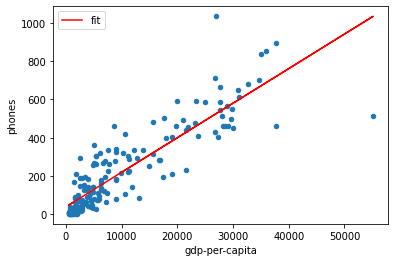

In [20]:
#Q15: plot the regression line to the scatter plot
ax = gdp_vs_phones.plot.scatter(x='gdp-per-capita', y='phones')

gdp_vs_phones["fit"] = gdp_vs_phones["gdp-per-capita"] * m + n
gdp_vs_phones.plot.line(x='gdp-per-capita', y='fit', c='red', ax=ax)

In [21]:
#Q16: What are the top 15 countries that have the smallest gap between birth rate and death rate?
smallest_gap = pd.read_sql("""
SELECT country, `birth-rate`, `death-rate`
FROM countries
ORDER BY (`birth-rate` - `death-rate`)
""", conn)
smallest_gap.columns = ["country", "birth-rate", "death-rate"]
top_15 = smallest_gap[:15]
top_15

,country,birth-rate,death-rate
0,Botswana,23.08,29.50
1,Ukraine,8.82,14.39
2,Russia,9.95,14.65
3,Bulgaria,9.65,14.27
4,Latvia,9.24,13.66
5,Lesotho,24.75,28.71
6,South Africa,18.20,22.00
7,Monaco,9.19,12.91
8,Hungary,9.72,13.11
9,Estonia,10.04,13.25


[Text(0, 0, 'Botswana'),
 Text(0, 1, 'Ukraine'),
 Text(0, 2, 'Russia'),
 Text(0, 3, 'Bulgaria'),
 Text(0, 4, 'Latvia'),
 Text(0, 5, 'Lesotho'),
 Text(0, 6, 'South Africa'),
 Text(0, 7, 'Monaco'),
 Text(0, 8, 'Hungary'),
 Text(0, 9, 'Estonia'),
 Text(0, 10, 'Belarus'),
 Text(0, 11, 'Germany'),
 Text(0, 12, 'Swaziland'),
 Text(0, 13, 'Lithuania'),
 Text(0, 14, 'Croatia')]

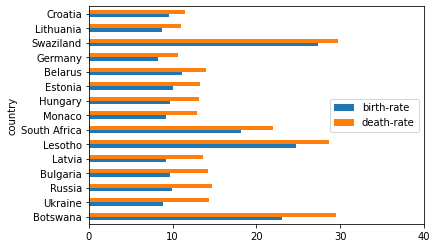

In [22]:
#Q17: What are the top 15 countries that have the smallest gap between birth rate and death rate? (answer with a plot)
country2 = top_15["country"]
top_15_plot = top_15.plot.barh()
top_15_plot.set_ylabel("country")
top_15_plot.set_xticks([0, 10, 20, 30, 40])
top_15_plot.set_yticklabels(list(country2.values))

<AxesSubplot:xlabel='population', ylabel='gdp-per-capita'>

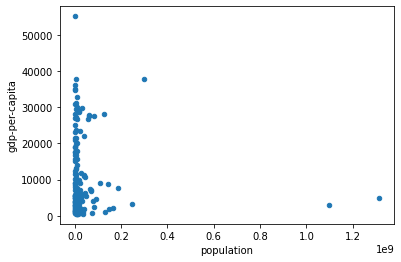

In [23]:
#Q18: What is the relationship between population and gdp-per-capita? (answer with a plot)
pop_vs_gdp = pd.read_sql("""
SELECT `population`, `gdp-per-capita`
FROM countries
""", conn)
pop_vs_gdp.columns = ["population", "gdp-per-capita"]
pop_vs_gdp.plot.scatter(x = "population", y = "gdp-per-capita")

In [24]:
#Q19: Did you notice the four outliers? Which countries are they?
country = Series(["India", "China", "United States", "Luxembourg"])
pop = Series([1095351995, 1313973713, 298444215, 474413])
gdp_per_capita = Series([2900, 5000, 37800, 55100])
DataFrame({
    "country": country,
    "population": pop,
    "gdp-per-capita": gdp_per_capita
})

,country,population,gdp-per-capita
0,India,1095351995,2900
1,China,1313973713,5000
2,United States,298444215,37800
3,Luxembourg,474413,55100


Text(0.5, 1.0, 'GDP Breakdown')

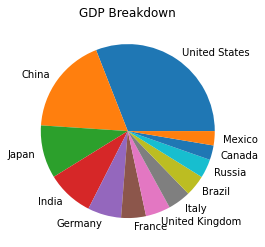

In [25]:
#Q20: what are the top 12 countries that have the largest real GDP? (answer with a plot)
top_12_no_other = lgst_real_gdp[:12]
labels = top_12_no_other["country"].to_list()
top_12_no_other.plot.pie(y= "Real GDP(billion)", labels = labels, legend = None)
plt.ylabel('')
plt.title("GDP Breakdown")